In [1]:
## 柱形图

<BarContainer object of 5 artists>

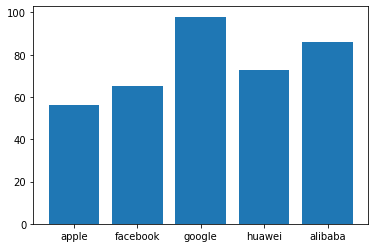

In [58]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

position = ['apple', 'facebook', 'google', 'huawei', 'alibaba']
data = [56, 65, 98, 73, 86]

plt.bar(x=position, height = data)

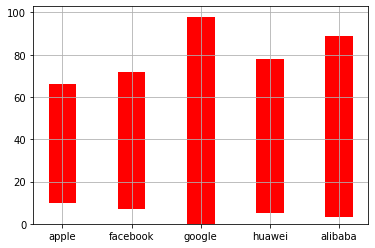

In [59]:
# 完整形式
# plt.bar(x, height, width=0.8, bottom=None, *, align='center' , data=None, **kwargs)
plt.bar(x=position, height=data, width=.4,bottom=[10,7,0,5,3], color='r', linewidth=5)
plt.grid(True)

<AxesSubplot:xlabel='position'>

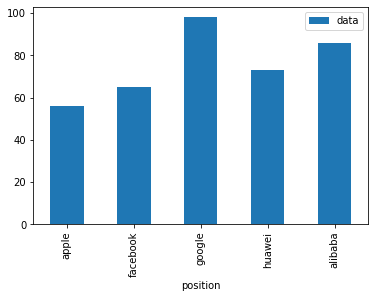

In [67]:
## pandas 实现
df = pd.DataFrame({'position':position, 'data':data})
df.plot.bar(x='position', y='data')

In [61]:
## 全国暑期票房收入统计
import tushare as ts
box_office = pd.DataFrame()

df = pd.read_csv('~/data/cbcpv/boxoffice/box1018.csv')
print(df.info())
print(df.columns)

# 以下为从tushare获取数据代码

# for y in range(2010, 2019):
#     ym = str(y) + '-8'
#     df = ts.box_office(ym)
#     box_office[ym] = df['boxoffice']

df.drop(columns='Unnamed: 0',axis=1, inplace=True)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  11 non-null     int64
 1   2010-8      11 non-null     int64
 2   2011-8      11 non-null     int64
 3   2012-8      11 non-null     int64
 4   2013-8      11 non-null     int64
 5   2014-8      11 non-null     int64
 6   2015-8      11 non-null     int64
 7   2016-8      11 non-null     int64
 8   2017-8      11 non-null     int64
 9   2018-8      11 non-null     int64
dtypes: int64(10)
memory usage: 1008.0 bytes
None
Index(['Unnamed: 0', '2010-8', '2011-8', '2012-8', '2013-8', '2014-8',
       '2015-8', '2016-8', '2017-8', '2018-8'],
      dtype='object')


,2010-8,2011-8,2012-8,2013-8,2014-8,2015-8,2016-8,2017-8,2018-8
0,26918,39162,27993,63665,39313,73427,98811,424006,132009
1,17760,30890,23051,29567,36338,54977,58144,53419,122078
2,8816,22919,15020,29460,28981,48912,38770,49087,102581
3,8125,17219,14636,17121,20807,20948,38675,34147,68285
4,5157,6243,13518,16468,18746,19542,34589,29012,55460
5,5133,5326,8895,14473,18714,18083,26931,23652,32013
6,3980,3594,7037,11416,16926,17220,16663,16825,23011
7,2655,3410,6868,7542,9770,14643,15334,15806,19543
8,2581,3301,4159,6286,9729,14458,14736,12588,17830
9,2233,1954,3471,5440,9464,9977,8376,11341,15238


In [62]:
## 计算每年的票房收入
box_office= df.astype(np.int) # change datatype to int
total = box_office.sum()
total

2010-8     91603
2011-8    147155
2012-8    141864
2013-8    226112
2014-8    262214
2015-8    361763
2016-8    405605
2017-8    736595
2018-8    682038
dtype: int64

/var/folders/jd/jhbp58m554l8fyt81nfks5jm0000gn/T/ipykernel_5917/4151419082.py:15: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  ax.xaxis.set_major_formatter(tf.IndexFormatter([0]+date_index.year.tolist()))


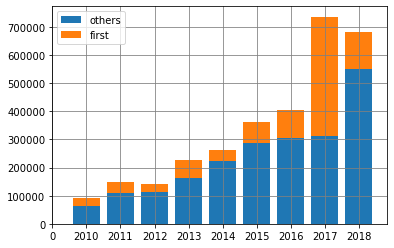

In [66]:
import matplotlib.ticker as tf

first = box_office.iloc[0].astype(np.int) # 历史票房第一
after_first = total - first # 其他影片票房收入

date_index= pd.to_datetime(total.index)

fig, ax = plt.subplots()
ax.grid(color='gray')

# 坐标系中绘制柱形图
ax.bar(range(1, 10), after_first.values, label='others')
# 成为 “堆积柱”
ax.bar(range(1, 10), first.values, bottom=after_first.values, label='first')

# 设置横坐标的主刻线以及相应的标示
ax.set_xticks(range(0, 10))
# 得到标示对象
ax.xaxis.set_major_formatter(tf.IndexFormatter([0]+date_index.year.tolist()))

plt.legend(loc=0)

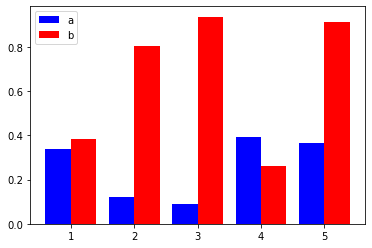

In [68]:
## 簇状柱形图
position = np.arange(1, 6)
a = np.random.random(5)
b = np.random.random(5)

total_width = 0.8
n = 2
width = total_width / n
# 计算除了每簇的中央位置
position = position - (total_width - width) / n
# 分别绘制每簇中的两个柱子
plt.bar(position, a, width = width, label='a', color = 'b')
# position + width 表示第二根柱子的中央线位置
plt.bar(position + width, b, width=width, label='b', color='r')
plt.legend(loc=0)

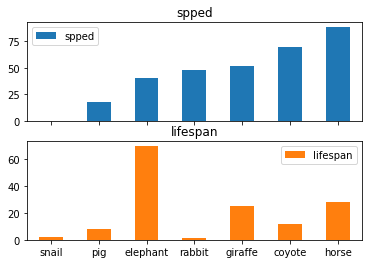

In [70]:
# DataFrame对象方法
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant', 'rabbit', 'giraffe', 'coyote', 'horse']

df = pd.DataFrame({'spped':speed,'lifespan':lifespan}, index=index)

ax = df.plot.bar(rot=0, subplots=True)

(-1.25, 1.25)

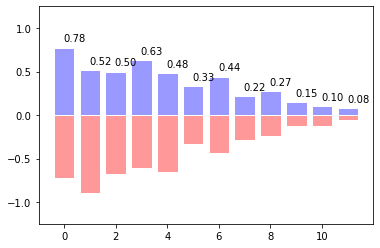

In [71]:
n = 12
X = np.arange(n)
y1 = (1-X/float(n)) * np.random.uniform(0.5, 1.0, n)
y2 = (1-X/float(n)) * np.random.uniform(0.5, 1.0, n)

plt.bar(X, +y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -y2, facecolor='#ff9999', edgecolor='white')

for x, y in zip(X, y1):
    plt.text(x + 0.4, y + 0.05, '%.2f' %y, ha='center', va='bottom')

plt.ylim(-1.25, +1.25)


<BarContainer object of 5 artists>

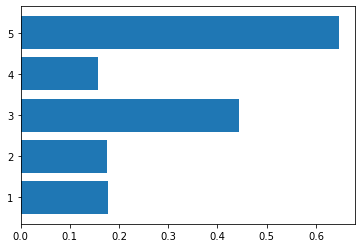

In [74]:
## 条形图
position = np.arange(1, 6)
a = np.random.random(5)
plt.barh(position, a)

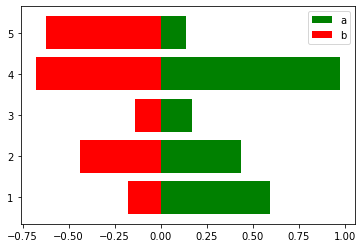

In [77]:
## 正负条形图
import matplotlib
matplotlib.rcParams['axes.unicode_minus']

position = np.arange(1, 6)
a = np.random.random(5)
b = np.random.random(5)

# 绘制正向条形图
plt.barh(position, a, color='g', label='a')
# 绘制负向条形图
plt.barh(position, -b, color='r', label='b')

plt.legend(loc=0)

Text(0.5, 0, 'Z')

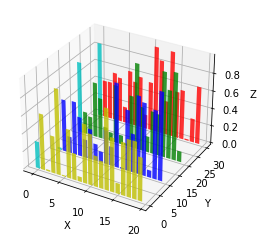

In [79]:
# 三维坐标系中的柱形图

# 引入必要依赖
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
# 设置坐标系类型参数
ax = fig.add_subplot(111, projection='3d')

# 循环赋值
for c, z in zip(['r','g','b','y'], [30,20,10,0]):
    xs = np.arange(20)
    ys = np.random.rand(20)
    cs = [c] * len(xs)
    cs[0]  = 'c'
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=.8)

# 设置坐标轴图示 
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

        School  Women  Men  Gap
10        Duke     93  124   31
8         Yale     79  114   35
6   Georgetown     94  131   37
2      Harvard    112  165   53
14     Cornell     80  107   27


<AxesSubplot:>

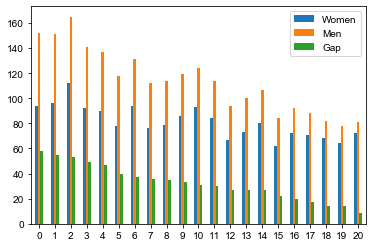

In [100]:
## 应用举例

# 引入依赖
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tk
from mpl_toolkits.mplot3d import Axes3D

# 加载数据集
df = pd.read_csv('~/data/cbcpv/school/school.csv')

# 数据集研究

print(df.sample(5))

# DataFrame方法
df.plot.bar(rot=0)

Text(0, 0.5, '毕业学校')

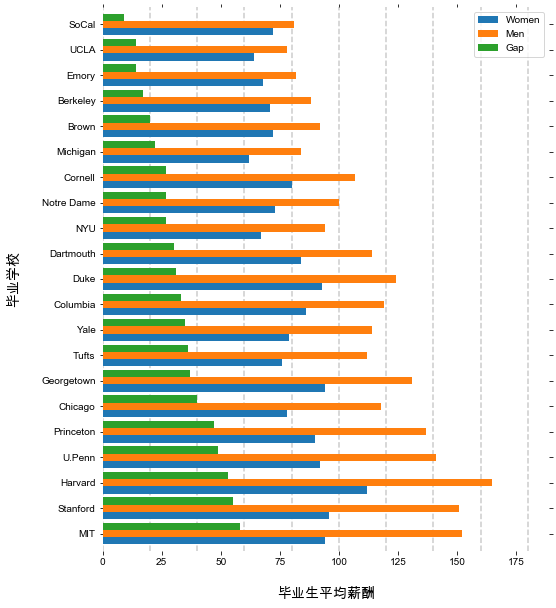

In [98]:
## School 示例
from matplotlib.ticker import StrMethodFormatter

matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS']
# 绘制图形
ax = df.plot(kind='barh', x='School', figsize=(8, 10), zorder=2, width=.85)

# 隐藏坐标轴
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# 设置刻度
ax.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='on', left='off', right='off', labelleft='on')

# 绘制垂直横轴的虚线
vals = ax.get_xticks()
# 依据刻度绘制垂直于x轴的虚线
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=.4, color='grey', zorder=1)

ax.set_xlabel('毕业生平均薪酬', labelpad=20, weight='bold', size=14)
ax.set_ylabel('毕业学校', labelpad=20, weight='bold', size=14)